# Analysis of Beijing Airbnb

## Winston

This is an analysis of Beijing aribnb data. Data can be downloaded from http://insideairbnb.com/get-the-data.html .

### Import packages

In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

### Read_data

In [2]:
listing = pd.read_csv('./data/listings_all.csv')

C:\Users\qxydl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (43,61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
listing.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,https://www.airbnb.com/rooms/44054,20190118024116,2019-01-18,Modern and Comfortable Living in CBD,East Apartments offers comfortable living away...,East Apartments is a western managed serviced ...,East Apartments offers comfortable living away...,none,The neighborhood is a private compound. Just ...,"*For long term reservations (over 90 days), pl...",The easiest method to get around is by taxi or...,*Guests have access to the Fulicheng gardens,NaN,Registration All guests are required to have a...,NaN,NaN,https://a0.muscache.com/im/pictures/ccadd958-6...,NaN,192875,https://www.airbnb.com/users/show/192875,East Apartments,2010-08-06,"Beijing, Beijing, China",Hi everyone! My name is Sev. I'm the Owner/O...,within an hour,100%,NaN,f,https://a0.muscache.com/im/pictures/9ea49dd1-d...,https://a0.muscache.com/im/pictures/9ea49dd1-d...,Shuangjing,10,10,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,f,"Beijing, Beijing, China",Shuangjing,朝阳区 / Chaoyang,NaN,Beijing,Beijing,100022,Beijing,"Beijing, China",CN,China,39.89503,116.451635,t,Serviced apartment,Entire home/apt,9,2.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1464.0,$799.00,"$8,009.00","$26,403.00",$677.00,$68.00,7,$68.00,1,365,1,1,365,365,1.0,365.0,3 days ago,t,9,38,64,335,2019-01-18,87,24,2010-08-25,2018-12-28,91.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,f,10,8,2,0,0.85
1,100213,https://www.airbnb.com/rooms/100213,20190118024116,2019-01-18,The Great Wall Box Deluxe Suite A团园长城小院东院套房,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,This is your guide to live by the Great Wall! ...,none,"5 mins walk to Panglongshan Great Wall, 25 min...","这里地处山区,森林覆盖率高,几乎没有PM2.5的影响｡但早晚温差大,尤其晚间气温较北京市区低...",We arrange taxi service at a very reasonable p...,NaN,NaN,"1, we have some kittens, thus it may not be su...",NaN,NaN,https://a0.muscache.com/im/pictures/85ad3843-0...,NaN,527062,https://www.airbnb.com/users/show/527062,Joe,2011-04-22,"Beijing, Beijing, China","我是老乔,喜欢长城,喜欢简单的生活｡\r\n2011年,我开始移居到北京东北部的古北口村,潮...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/9699cf5e-a...,https://a0.muscache.com/im/pictures/9699cf5e-a...,NaN,4,4,"['phone', 'facebook', 'reviews']",t,f

### Filter column

In [4]:
use_col = ['id','host_since','host_response_time','host_response_rate','neighbourhood_cleansed','property_type','room_type','accommodates',
           'bathrooms','bedrooms','beds','bed_type','square_feet','price','monthly_price','number_of_reviews','review_scores_rating',
           'calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
           'calculated_host_listings_count_shared_rooms','reviews_per_month']

In [5]:
df = listing[use_col]
df.head()

,id,host_since,host_response_time,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,monthly_price,number_of_reviews,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,2010-08-06,within an hour,100%,朝阳区 / Chaoyang,Serviced apartment,Entire home/apt,9,2.0,3.0,4.0,Real Bed,1464.0,$799.00,"$26,403.00",87,91.0,10,8,2,0,0.85
1,100213,2011-04-22,NaN,NaN,密云县 / Miyun,Guest suite,Private room,2,1.0,1.0,1.0,Real Bed,NaN,"$1,198.00","$28,800.00",2,100.0,4,0,3,1,0.12
2,128496,2011-03-28,NaN,NaN,东城区,House,Entire home/apt,3,1.0,1.0,1.0,Real Bed,323.0,$393.00,NaN,258,97.0,1,1,0,0,2.78
3,161902,2011-06-16,within a day,100%,东城区,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,$379.00,"$10,832.00",26,77.0,5,5,0,0,0.29
4,162144,2011-06-16,within a day,100%,朝阳区 / Chaoyang,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,0.0,$542.00,"$10,832.00",37,87.0,5,5,0,0,0.42


We can see that the price variables are all string data, and I'm going to deal with that next.

### Fix Price

In [6]:
def df_fix(data, colname):
    for i in colname:
        a = data[i].str.replace('$','').str.replace(',','').str.replace('%','')
        data[i] = pd.to_numeric(a)

In [7]:
df_fix(df, ['host_response_rate','price','monthly_price'])

C:\Users\qxydl\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [8]:
df.head()

,id,host_since,host_response_time,host_response_rate,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,monthly_price,number_of_reviews,review_scores_rating,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,44054,2010-08-06,within an hour,100.0,朝阳区 / Chaoyang,Serviced apartment,Entire home/apt,9,2.0,3.0,4.0,Real Bed,1464.0,799.0,26403.0,87,91.0,10,8,2,0,0.85
1,100213,2011-04-22,NaN,NaN,密云县 / Miyun,Guest suite,Private room,2,1.0,1.0,1.0,Real Bed,NaN,1198.0,28800.0,2,100.0,4,0,3,1,0.12
2,128496,2011-03-28,NaN,NaN,东城区,House,Entire home/apt,3,1.0,1.0,1.0,Real Bed,323.0,393.0,NaN,258,97.0,1,1,0,0,2.78
3,161902,2011-06-16,within a day,100.0,东城区,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,NaN,379.0,10832.0,26,77.0,5,5,0,0,0.29
4,162144,2011-06-16,within a day,100.0,朝阳区 / Chaoyang,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,0.0,542.0,10832.0,37,87.0,5,5,0,0,0.42


In [9]:
df.dtypes

id                                                int64
host_since                                       object
host_response_time                               object
host_response_rate                              float64
neighbourhood_cleansed                           object
property_type                                    object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
bed_type                                         object
square_feet                                     float64
price                                           float64
monthly_price                                   float64
number_of_reviews                                 int64
review_scores_rating                            float64
calculated_host_listings_count                  

It looks a little better！

## Question1:  What is the overall Aribnb price distribution in Beijing?

In [10]:
df['price'].describe()

count    25255.000000
mean       598.158266
std       1543.805852
min          0.000000
25%        230.000000
50%        379.000000
75%        569.000000
max      68979.000000
Name: price, dtype: float64

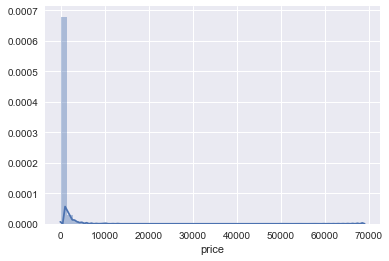

In [11]:
sns.distplot(df['price'])

(array([  2.51420000e+04,   9.00000000e+01,   7.00000000e+00,
          0.00000000e+00,   6.00000000e+00,   2.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   2.00000000e+00,
          5.00000000e+00]),
 array([     0. ,   6897.9,  13795.8,  20693.7,  27591.6,  34489.5,
         41387.4,  48285.3,  55183.2,  62081.1,  68979. ]),
 <a list of 10 Patch objects>)

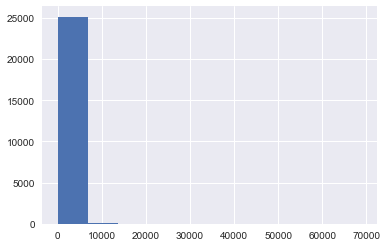

In [12]:
plt.hist(df['price'])

In [13]:
print('Less than $10000 percent:',round(len(df[df['price']<10000])/len(df)*100,2),'%')
print('Less than $2000 percent:',round(len(df[df['price']<2000])/len(df)*100,2),'%')

Less than $10000 percent: 99.81 %
Less than $2000 percent: 96.48 %


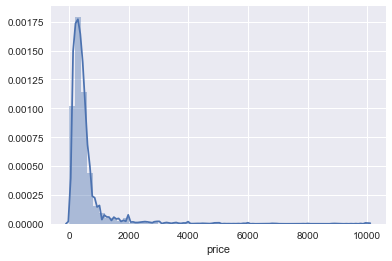

In [14]:
sns.distplot(df[df['price']<10000]['price'])

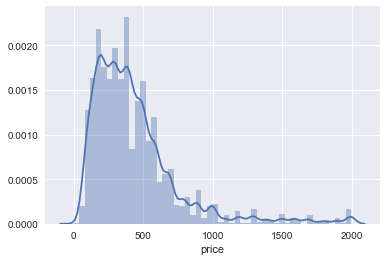

In [15]:
sns.distplot(df[df['price']<2000]['price'])

We can see that the price distribution is particularly uneven. The distribution is mainly concentrated in the area below 2000.

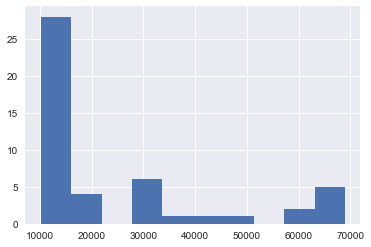

In [16]:
plt.hist(df[df['price']>=10000]['price']);

## Question 2： Will rental users be concentrated in one area of Beijing?

In [17]:
df['neighbourhood_cleansed'].value_counts()

朝阳区 / Chaoyang      9990
东城区                 3080
海淀区                 2938
西城区                 1498
丰台区 / Fengtai       1416
通州区 / Tongzhou      1136
昌平区                  951
密云县 / Miyun          753
大兴区 / Daxing         718
顺义区 / Shunyi         681
怀柔区 / Huairou        662
延庆县 / Yanqing        566
房山区                  444
石景山区                 178
门头沟区 / Mentougou     129
平谷区 / Pinggu         115
Name: neighbourhood_cleansed, dtype: int64

#### I need to do some cleaning of the area data.

In [18]:
area_cnt = df['neighbourhood_cleansed'].str.slice(0,3).value_counts()

In [19]:
area_cnt

朝阳区    9990
东城区    3080
海淀区    2938
西城区    1498
丰台区    1416
通州区    1136
昌平区     951
密云县     753
大兴区     718
顺义区     681
怀柔区     662
延庆县     566
房山区     444
石景山     178
门头沟     129
平谷区     115
Name: neighbourhood_cleansed, dtype: int64

So it looks better.

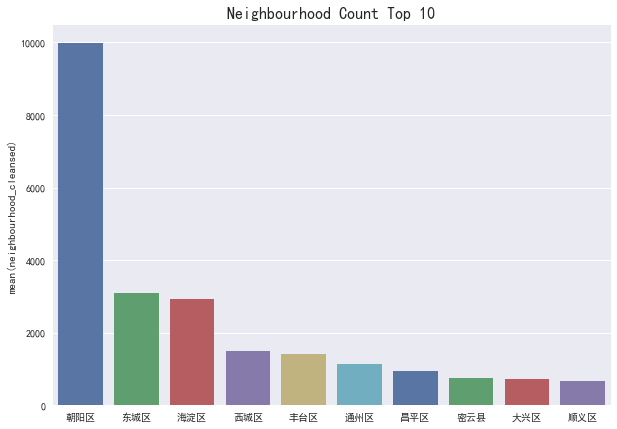

In [20]:
plt.rcParams['font.sans-serif'] = ['SimHei']
sns.set(font='SimHei')
fig, ax = plt.subplots(figsize=(10, 7))
   
#ax2.title.set_text('Second Plot') 
#ax.title.set_text('Interesting Graph',fontsize='large')
ax.title.set_fontsize(16)
ax.title.set_text('Neighbourhood Count Top 10')
sns.barplot(x=area_cnt[:10].index,
            y=area_cnt[:10],
            ax = ax,
            palette=sns.color_palette('deep'))

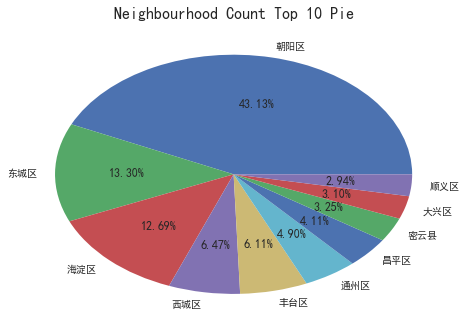

In [21]:
plt.pie(area_cnt[:10],labels=area_cnt.index[:10],autopct='%1.2f%%')
plt.title('Neighbourhood Count Top 10 Pie',fontsize=16)

In [22]:
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].str.slice(0,3)

C:\Users\qxydl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


## Question 3： The differences of prices in different regions & different room type

In [23]:
Dif_price = df[['neighbourhood_cleansed','price','room_type']]

In [24]:
Dif_price.head()

,neighbourhood_cleansed,price,room_type
0,朝阳区,799.0,Entire home/apt
1,密云县,1198.0,Private room
2,东城区,393.0,Entire home/apt
3,东城区,379.0,Entire home/apt
4,朝阳区,542.0,Entire home/apt


In [25]:
Dif_price.shape

(25255, 3)

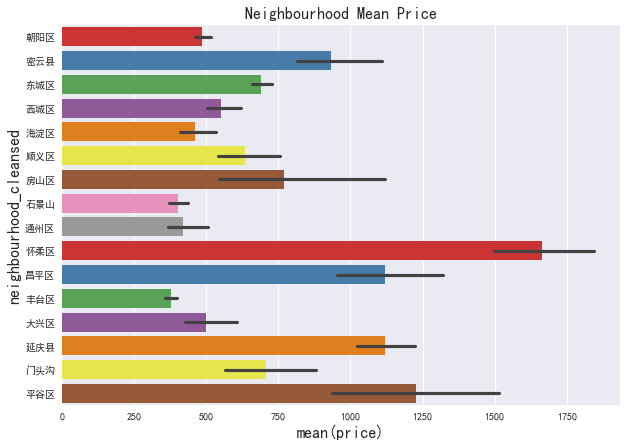

In [27]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.title.set_fontsize(16)
ax.title.set_text('Neighbourhood Mean Price')
plt.ylabel('Neighbourhood', fontsize=16)
plt.xlabel('mean_price', fontsize=16)

sns.barplot(y=Dif_price['neighbourhood_cleansed'], x=Dif_price['price'],ax = ax, orient='h',palette='Set1')

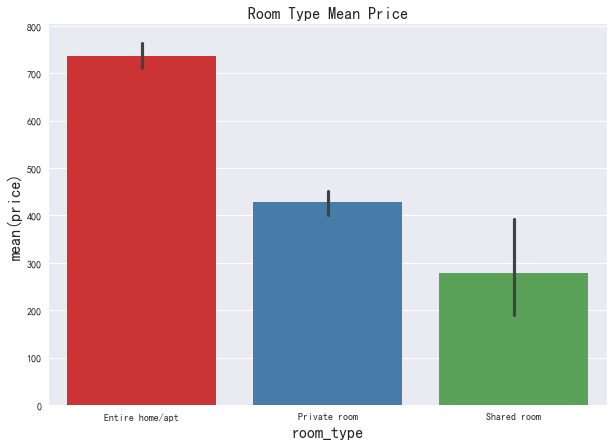

In [28]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.title.set_fontsize(16)
ax.title.set_text('Room Type Mean Price')
plt.ylabel('Room Type', fontsize=16)
plt.xlabel('Price(mean)', fontsize=16)

sns.barplot(y=Dif_price['price'], x=Dif_price['room_type'],ax = ax, orient='v',palette='Set1')

## Question 4： What factors have a greater impact on housing prices?

Let's see the heatmap:

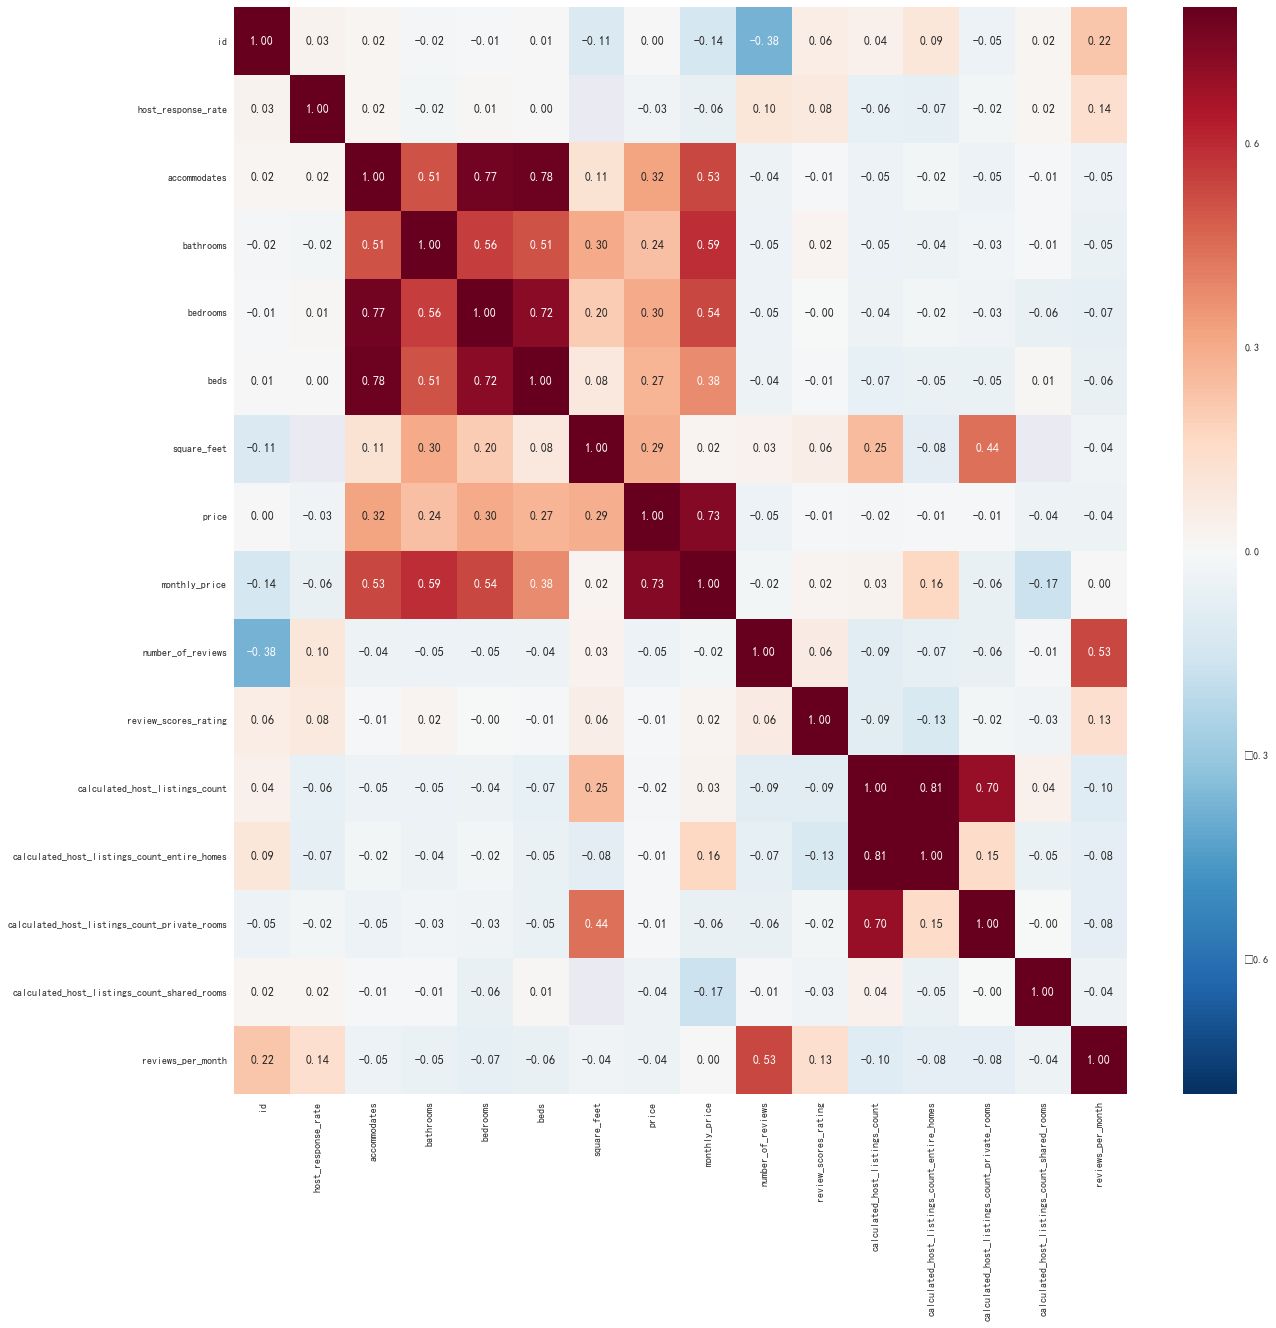

In [30]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(df.corr(), ax=ax, fmt=".2f",  annot=True, cbar=True, 
            vmin=-0.8, vmax=0.8)
            #cmap=plt.cm.Blues)
#plt.savefig("test.png", dpi=300)

We can see from the heatmap that some variables are more correlated with prices, which are accommodates, bathrooms, bedrooms, beds. I think this is make sense.

## Write in the last

This project was completed in a hurry, because my course was not extended for several days and I still had several projects to finish. If I have time later, I can sort through the variables and predict the price of the house. Thank you!!!